# Import packages

In [1]:
import sys
import os
import io
import yfinance as yf  # For stock data
import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import datetime
from datetime import timedelta
#!pip install tabulate
from tabulate import tabulate


import matplotlib.pyplot as plt  # For visualizations
#!pip install statsmodels
import statsmodels.api as sm

import importlib

# Import stock data

In [2]:
try:
    importlib.reload(sys.modules['data.api_get_sp500_15m'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from data.api_get_sp500_15m import apiGetStockData

apigetstockdata = apiGetStockData()
apigetstockdata.run()

outputs_dict = apigetstockdata.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

NO loaded libraries 'data.api_get_sp500_15m'


/home/user/Documents/airflow_predictive/dags/src/trading/data/api_get_sp500_15m.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(self.ticker, interval=self.interval, period=self.period)
[*********************100%***********************]  1 of 1 completed
2025-09-28 12:26:24,659 - data.api_get_sp500_15m - INFO - 
WU -> Stock market data: (1548, 7)
2025-09-28 12:26:24,674 - data.api_get_sp500_15m - INFO - 
WU -> Last reported dates into the data:
          Date  candles              min_datetime              max_datetime  \
53  2025-09-18       26 2025-09-18 13:30:00+00:00 2025-09-18 19:45:00+00:00   
54  2025-09-19       26 2025-09-19 13:30:00+00:00 2025-09-19 19:45:00+00:00   
55  2025-09-22       26 2025-09-22 13:30:00+00:00 2025-09-22 19:45:00+00:00   
56  2025-09-23       26 2025-09-23 13:30:00+00:00 2025-09-23 19:45:00+00:00   
57  2025-09-24       26 2025-09-24 13:30:00+00:00 2025-09-24 19:45:00+00:00   
58  2025-09-25  

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj
0,0,2025-07-03 13:30:00+00:00,6256.939941,6257.589844,6246.459961,6246.459961,88999570,2025-07-03,1330,NaN
1,1,2025-07-03 13:45:00+00:00,6262.430176,6267.540039,6256.209961,6256.890137,121869445,2025-07-03,1345,6256.939941
2,2,2025-07-03 14:00:00+00:00,6269.939941,6271.890137,6262.250000,6262.250000,122457895,2025-07-03,1400,6262.430176
3,3,2025-07-03 14:15:00+00:00,6271.870117,6272.850098,6267.669922,6269.859863,116729359,2025-07-03,1415,6269.939941
4,4,2025-07-03 14:30:00+00:00,6275.529785,6276.250000,6270.129883,6272.029785,103017737,2025-07-03,1430,6271.870117
...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-26 18:45:00+00:00,6644.390137,6645.250000,6640.759766,6644.379883,73550000,2025-09-26,1845,6644.419922
1544,1544,2025-09-26 19:00:00+00:00,6640.410156,6645.250000,6640.140137,6644.379883,76469000,2025-09-26,1900,6644.390137
1545,1545,2025-09-26 19:15:00+00:00,6641.830078,6644.180176,6639.040039,6640.419922,82438000,2025-09-26,1915,6640.410156
1546,1546,2025-09-26 19:30:00+00:00,6639.910156,6642.160156,6639.379883,6641.839844,109243000,2025-09-26,1930,6641.830078


# Compute indicators

In [22]:
try:
    importlib.reload(sys.modules['logics.compute_strategies_indicators'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.compute_strategies_indicators import computeStrategiesIndicators


strategy = 'sp500_15m_v2'
computestrategiessndicators = computeStrategiesIndicators(strategy = strategy, inputs_dict = outputs_dict)
computestrategiessndicators.run()

outputs_dict = computestrategiessndicators.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

2025-09-28 13:28:53,793 - logics.compute_strategies_indicators - INFO - 
WU -> Report of slopes values:
    slope_bucket     min_s     max_s     avg_s  frequence
0              0 -0.007146 -0.000631 -0.001291        132
1              1 -0.000627 -0.000398 -0.000499        131
2              2 -0.000398 -0.000265 -0.000329        132
3              3 -0.000263 -0.000156 -0.000210        131
4              4 -0.000155 -0.000066 -0.000111        131
5              5 -0.000065  0.000016 -0.000028        132
6              6  0.000017  0.000115  0.000068        131
7              7  0.000116  0.000232  0.000172        131
8              8  0.000232  0.000397  0.000309        132
9              9  0.000397  0.000682  0.000524        131
10            10  0.000684  0.004582  0.001361        132



,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,open_price,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,pp_strategy_gain
0,0,2025-07-03 13:30:00+00:00,6256.939941,6257.589844,6246.459961,6246.459961,88999570,2025-07-03,1330,NaN,...,0.000000,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2025-07-03 13:45:00+00:00,6262.430176,6267.540039,6256.209961,6256.890137,121869445,2025-07-03,1345,6256.939941,...,0.000000,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2025-07-03 14:00:00+00:00,6269.939941,6271.890137,6262.250000,6262.250000,122457895,2025-07-03,1400,6262.430176,...,0.000000,0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,2025-07-03 14:15:00+00:00,6271.870117,6272.850098,6267.669922,6269.859863,116729359,2025-07-03,1415,6269.939941,...,0.000000,0,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,2025-07-03 14:30:00+00:00,6275.529785,6276.250000,6270.129883,6272.029785,103017737,2025-07-03,1430,6271.870117,...,0.000000,0,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-26 18:45:00+00:00,6644.390137,6645.250000,6640.759766,6644.379883,73550000,2025-09-26,1845,6644.419922,...,6630.180176,137,11,-0.029785,-0.002092,17.450195,-3.240234,-0.000004,14.209961,0.002143
1544,1544,2025-09-26 19:00:00+00:00,6640.410156,6645.250000,6640.140137,6644.379883,76469000,2025-09-26,1900,6644.390137,...,6630.180176,137,12,-3.979980,-0.280084,17.450195,-7.220215,-0.000599,10.229980,0.001543
1545,1545,2025-09-26 19:15:00+00:00,6641.830078,6644.180176,6639.040039,6640.419922,82438000,2025-09-26,1915,6640.410156,...,6630.180176,137,13,1.419922,0.138800,18.870117,-7.220215,0.000214,11.649902,0.001757
1546,1546,2025-09-26 19:30:00+00:00,6639.910156,6642.160156,6639.379883,6641.839844,109243000,2025-09-26,1930,6641.830078,...,6630.180176,137,14,-1.919922,-0.164802,18.870117,-9.140137,-0.000289,9.729980,0.001468


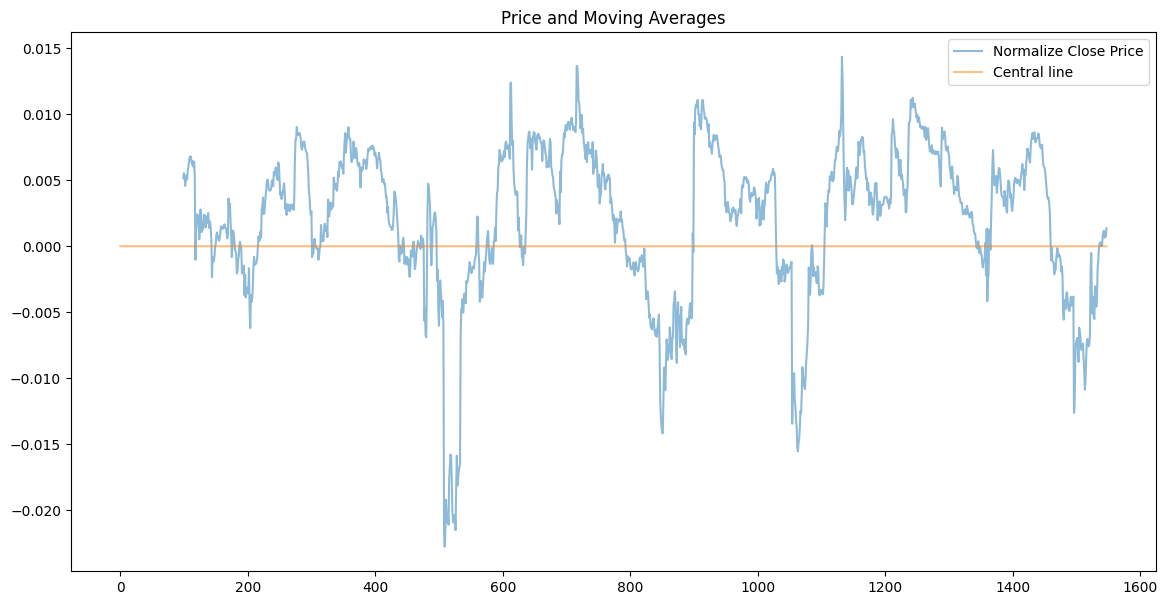

In [9]:
zeros_ls = [0] * len(data_e2_df['nclose'])



plt.figure(figsize=(14, 7))
plt.plot(data_e2_df['nclose'], label='Normalize Close Price', alpha=0.5)
plt.plot(zeros_ls, label='Central line', alpha=0.5)
plt.title(f"Price and Moving Averages")
plt.legend()
plt.show()

In [17]:
0.010* (2/3)

0.006666666666666666

In [ ]:
0, 1, 1, 2, 3, 5
0, 0, 1, 1/2, 2/3, 3/5 

# Strategy implementation

In [37]:
try:
    importlib.reload(sys.modules['logics.strategies_implementation'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.strategies_implementation import strategiesImplementation


strategy = 'sp500_15m_v2'
strategiesimplementation = strategiesImplementation(strategy = strategy, inputs_dict = outputs_dict)
strategiesimplementation.run()

outputs_dict = strategiesimplementation.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,open_price,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,pp_strategy_gain
0,0,2025-07-03 13:30:00+00:00,6256.939941,6257.589844,6246.459961,6246.459961,88999570,2025-07-03,1330,NaN,...,0.000000,0,1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,1,2025-07-03 13:45:00+00:00,6262.430176,6267.540039,6256.209961,6256.890137,121869445,2025-07-03,1345,6256.939941,...,0.000000,0,2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,2,2025-07-03 14:00:00+00:00,6269.939941,6271.890137,6262.250000,6262.250000,122457895,2025-07-03,1400,6262.430176,...,0.000000,0,3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,3,2025-07-03 14:15:00+00:00,6271.870117,6272.850098,6267.669922,6269.859863,116729359,2025-07-03,1415,6269.939941,...,0.000000,0,4,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,4,2025-07-03 14:30:00+00:00,6275.529785,6276.250000,6270.129883,6272.029785,103017737,2025-07-03,1430,6271.870117,...,0.000000,0,5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-26 18:45:00+00:00,6644.390137,6645.250000,6640.759766,6644.379883,73550000,2025-09-26,1845,6644.419922,...,6624.560059,151,15,-0.0,0.0,3.530273,-11.740234,-0.0,-8.209961,-0.001239
1544,1544,2025-09-26 19:00:00+00:00,6640.410156,6645.250000,6640.140137,6644.379883,76469000,2025-09-26,1900,6644.390137,...,6624.560059,151,16,-0.0,0.0,3.530273,-11.740234,-0.0,-8.209961,-0.001239
1545,1545,2025-09-26 19:15:00+00:00,6641.830078,6644.180176,6639.040039,6640.419922,82438000,2025-09-26,1915,6640.410156,...,6624.560059,151,17,0.0,-0.0,3.530273,-11.740234,0.0,-8.209961,-0.001239
1546,1546,2025-09-26 19:30:00+00:00,6639.910156,6642.160156,6639.379883,6641.839844,109243000,2025-09-26,1930,6641.830078,...,6624.560059,151,18,-0.0,0.0,3.530273,-11.740234,-0.0,-8.209961,-0.001239


In [38]:
data_e2_df.value_counts(['signal'])

signal
0         1446
1          102
Name: count, dtype: int64

# Performance metrics

2025-09-28 13:37:26,614 - logics.performance_metrics - INFO - 
WU -> Data for compute performance of strategy:
(1353, 30)

2025-09-28 13:37:26,647 - logics.performance_metrics - INFO - WU ->
Total Strategy Return: 0.81%
Total Market Return: 6.17%



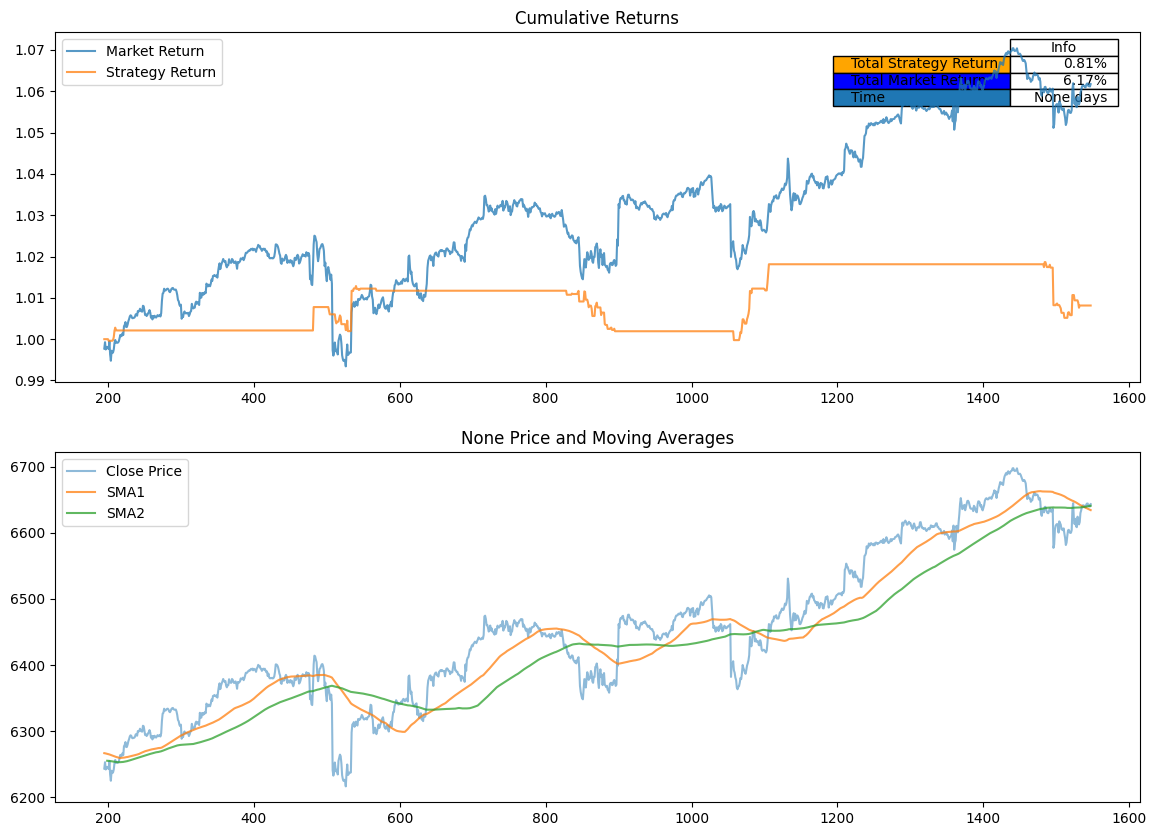

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,pp_strategy_gain,Cumulative Market Return,Cumulative Strategy Return
195,195,2025-07-15 19:45:00+00:00,6243.100098,6258.490234,6242.450195,6257.339844,338698000,2025-07-15,1945,6257.359863,...,1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.997721,1.000000
196,196,2025-07-16 13:30:00+00:00,6252.759766,6261.600098,6251.359863,6254.500000,213903452,2025-07-16,1330,6243.100098,...,2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.999265,1.000000
197,197,2025-07-16 13:45:00+00:00,6241.750000,6252.930176,6241.609863,6252.680176,122801010,2025-07-16,1345,6252.759766,...,1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.997505,1.000000
198,198,2025-07-16 14:00:00+00:00,6243.430176,6248.399902,6238.540039,6241.850098,123720431,2025-07-16,1400,6241.750000,...,1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.997774,1.000000
199,199,2025-07-16 14:15:00+00:00,6245.790039,6249.319824,6241.520020,6243.310059,106623255,2025-07-16,1415,6243.430176,...,1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.998151,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-26 18:45:00+00:00,6644.390137,6645.250000,6640.759766,6644.379883,73550000,2025-09-26,1845,6644.419922,...,15,-0.0,0.0,3.530273,-11.740234,-0.0,-8.209961,-0.001239,1.061852,1.008144
1544,1544,2025-09-26 19:00:00+00:00,6640.410156,6645.250000,6640.140137,6644.379883,76469000,2025-09-26,1900,6644.390137,...,16,-0.0,0.0,3.530273,-11.740234,-0.0,-8.209961,-0.001239,1.061216,1.008144
1545,1545,2025-09-26 19:15:00+00:00,6641.830078,6644.180176,6639.040039,6640.419922,82438000,2025-09-26,1915,6640.410156,...,17,0.0,-0.0,3.530273,-11.740234,0.0,-8.209961,-0.001239,1.061443,1.008144
1546,1546,2025-09-26 19:30:00+00:00,6639.910156,6642.160156,6639.379883,6641.839844,109243000,2025-09-26,1930,6641.830078,...,18,-0.0,0.0,3.530273,-11.740234,-0.0,-8.209961,-0.001239,1.061136,1.008144


In [39]:
try:
    importlib.reload(sys.modules['logics.performance_metrics'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.performance_metrics import performanceMetrics


strategy = 'sp500_15m'

params_dict = {}
#params_dict['interval'] = '15m'
#params_dict['days'] = 7
#params_dict['ticker'] = 'ĜSPC'

performancemetrics = performanceMetrics(inputs_dict = outputs_dict, params_dict=params_dict)
#performancemetrics = performanceMetrics(inputs_dict = outputs_dict)
performancemetrics.run()

outputs_dict = performancemetrics.outputs_dict
data_e_df = outputs_dict['data_e_df'].copy()
data_e_df

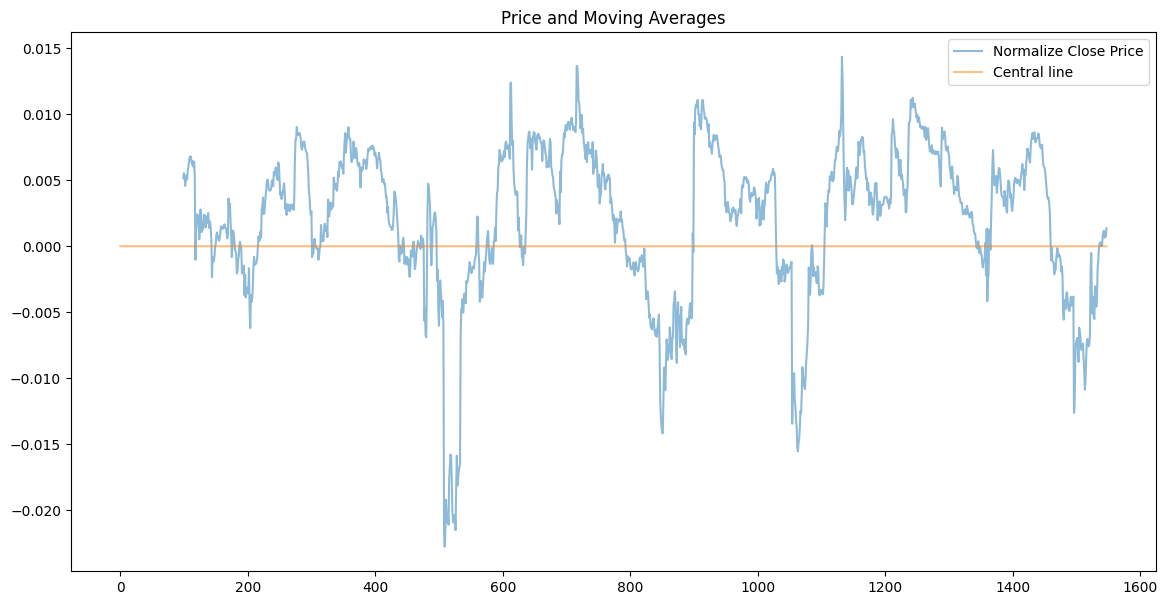

In [40]:
zeros_ls = [0] * len(data_e2_df['nclose'])



plt.figure(figsize=(14, 7))
plt.plot(data_e2_df['nclose'], label='Normalize Close Price', alpha=0.5)
plt.plot(zeros_ls, label='Central line', alpha=0.5)
plt.title(f"Price and Moving Averages")
plt.legend()
plt.show()

# Signal delivery

In [42]:
icols_ls = ['Datetime','Close', 'Open_adj', 'SMA1','sma1_diff', 'signal',
       'order_number', 'order_step', 'strategy_gain', 'pp_change_gain', 'order_gain_balance', 'order_loss_balance',
       'acum_strategy_gain', 'pp_strategy_gain','slope1','tendency',
       'current_return','strategy_return', 'Cumulative Market Return', 'Cumulative Strategy Return']


data_e_df[icols_ls].tail(30)

,Datetime,Close,Open_adj,SMA1,sma1_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,acum_strategy_gain,pp_strategy_gain,slope1,tendency,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
150,2025-09-25 14:30:00+00:00,6612.609863,6610.770020,6660.050688,-47.440825,1,226,3,1.839844,0.304116,7.889648,0.000000,7.889648,0.001195,9.679980,1,0.000278,0.000278,1.002343,1.014776
151,2025-09-25 14:45:00+00:00,6613.500000,6612.609863,6659.766489,-46.266489,1,226,4,0.890137,0.112823,8.779785,0.000000,8.779785,0.001329,2.817920,1,0.000135,0.000135,1.002478,1.014913
152,2025-09-25 15:00:00+00:00,6610.879883,6613.500000,6659.388286,-48.508403,1,226,5,-2.620117,-0.298426,8.779785,-2.620117,6.159668,0.000933,0.121973,1,-0.000396,-0.000396,1.002081,1.014511
153,2025-09-25 15:15:00+00:00,6600.500000,6610.879883,6658.880386,-58.380386,0,226,6,-10.379883,-1.685137,8.779785,-13.000000,-4.220215,-0.000639,-3.894971,-1,-0.001570,-0.001570,1.000508,1.012918
154,2025-09-25 15:30:00+00:00,6617.470215,6600.500000,6658.530186,-41.059971,1,227,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153076,1,0.002571,0.000000,1.003080,1.012918
155,2025-09-25 15:45:00+00:00,6614.879883,6617.470215,6658.160283,-43.280400,1,227,2,-2.590332,0.000000,0.000000,-2.590332,-2.590332,-0.000391,2.897021,2,-0.000391,-0.000391,1.002688,1.012521
156,2025-09-25 16:00:00+00:00,6612.470215,6614.879883,6657.778486,-45.308271,1,227,3,-2.409668,0.930254,0.000000,-5.000000,-5.000000,-0.000756,3.332031,3,-0.000364,-0.000364,1.002322,1.012152
157,2025-09-25 16:15:00+00:00,6605.250000,6612.470215,6657.319688,-52.069688,0,227,4,-7.220215,1.444043,0.000000,-12.220215,-12.220215,-0.001847,-3.907031,-1,-0.001092,-0.001092,1.001228,1.011047
158,2025-09-25 16:30:00+00:00,6606.399902,6605.250000,6656.849487,-50.449585,1,228,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.266016,-1,0.000174,0.000000,1.001402,1.011047
159,2025-09-25 16:45:00+00:00,6604.040039,6606.399902,6656.355688,-52.315649,1,228,2,-2.359863,0.000000,0.000000,-2.359863,-2.359863,-0.000357,-2.414062,-1,-0.000357,-0.000357,1.001044,1.010686


In [43]:
current_datetime = max(data_e_df['Datetime'])
signal_dt = current_datetime - timedelta(minutes=30)
signal_dt

Timestamp('2025-09-26 14:45:00+0000', tz='UTC')

In [298]:
try:
    importlib.reload(sys.modules['logics.deliver_last_signal'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.deliver_last_signal import deliverLastSignal

params_dict = {}
params_dict['strategy'] = strategy

deliverlastsignal = deliverLastSignal(inputs_dict = outputs_dict, params_dict=params_dict)
deliverlastsignal.run()

outputs_dict = deliverlastsignal.outputs_dict
last_signals_df = outputs_dict['last_signals_df'].copy()
last_signals_df

2025-09-27 00:25:20,406 - logics.deliver_last_signal - INFO - WU ->
Last stock date: 2025-09-26 19:45:00+00:00
Limit date: 2025-09-26 20:15:00+00:00
Current date: 2025-09-27 05:25:20.406644+00:00
/home/user/Documents/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df = last_signals_df.iloc[[-1]]
/home/user/Documents/trading/logics/deliver_last_signal.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df = last_signal_df.reset_index(drop=True)

,Datetime,Close,SMA1,slope1,signal,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,prev_signal,Action,Strategy
0,2025-09-26 19:00:00+00:00,6640.410156,6636.098892,-0.740967,1,-3.979980,-4.009766,1.003638,1.003739,1.0,NA,sp500_15m
1,2025-09-26 19:15:00+00:00,6641.830078,6635.568994,-1.174951,0,1.419922,-2.589844,1.003853,1.003954,1.0,CLOSE,sp500_15m
2,2025-09-26 19:30:00+00:00,6639.910156,6634.990596,-1.202002,0,-0.000000,-2.589844,1.003562,1.003954,0.0,NA,sp500_15m
3,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0,0.000000,-2.589844,1.004111,1.003954,0.0,NA,sp500_15m


In [299]:
last_signal_df = outputs_dict['last_signal_df'].copy()
last_signal_df

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0.0,-2.589844,1.004111,1.003954,NA,sp500_15m,CLOSE


In [300]:
last_signal = outputs_dict['last_signal'].copy()
last_signal

,Descripción,Valor
0,Datetime,2025-09-26 19:45:00+00:00
1,Close,6643.540039
2,SMA1,6634.503896
3,slope1,0.746973
4,strategy_gain,0.0
5,acum_strategy_gain,-2.589844
6,Cumulative Market Return,1.004111
7,Cumulative Strategy Return,1.003954
8,Action,NA
9,Strategy,sp500_15m


# Total strategy computation process

/home/user/Documents/trading/data/api_get_sp500_15m.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(self.ticker, interval=self.interval, period=self.period)
[*********************100%***********************]  1 of 1 completed
2025-09-27 00:26:52,745 - data.api_get_sp500_15m - INFO - 
WU -> Stock market data: (1548, 7)
2025-09-27 00:26:52,759 - data.api_get_sp500_15m - INFO - 
WU -> Last reported dates into the data:
          Date  candles              min_datetime              max_datetime  \
53  2025-09-18       26 2025-09-18 13:30:00+00:00 2025-09-18 19:45:00+00:00   
54  2025-09-19       26 2025-09-19 13:30:00+00:00 2025-09-19 19:45:00+00:00   
55  2025-09-22       26 2025-09-22 13:30:00+00:00 2025-09-22 19:45:00+00:00   
56  2025-09-23       26 2025-09-23 13:30:00+00:00 2025-09-23 19:45:00+00:00   
57  2025-09-24       26 2025-09-24 13:30:00+00:00 2025-09-24 19:45:00+00:00   
58  2025-09-25       26 2025-09-25 13:30:00+

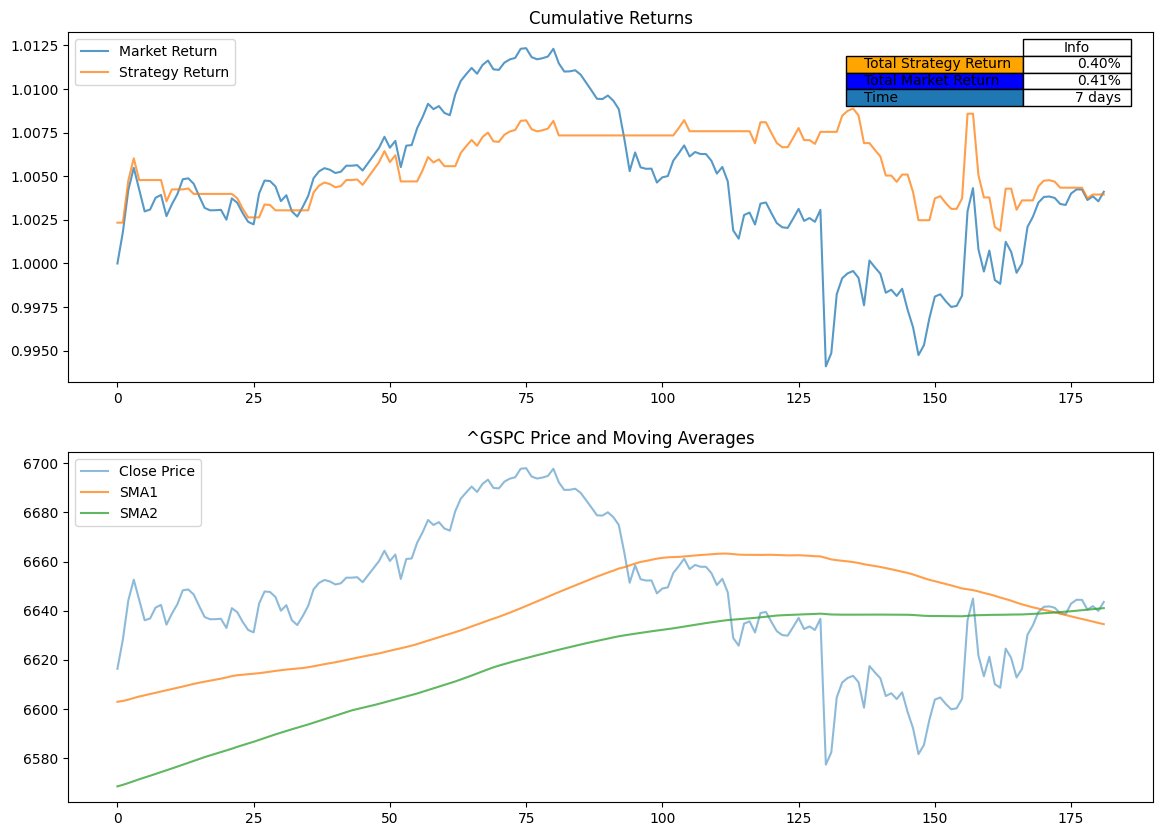

2025-09-27 00:26:54,114 - logics.deliver_last_signal - INFO - WU ->
Last stock date: 2025-09-26 19:45:00+00:00
Limit date: 2025-09-26 20:15:00+00:00
Current date: 2025-09-27 05:26:54.114910+00:00
/home/user/Documents/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df = last_signals_df.iloc[[-1]]
/home/user/Documents/trading/logics/deliver_last_signal.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df = last_signal_df.reset_index(drop=True)

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0.0,-2.589844,1.004111,1.003954,NA,sp500_15m,CLOSE


In [301]:
try:
    importlib.reload(sys.modules['SP500_15m_strategy'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()
sp50015mstrategy.run()
outputs_dict = sp50015mstrategy.outputs_dict
last_signal_df = outputs_dict['last_signal_df'].copy()
last_signal_df

# Send notification

## Send notification to whatsapp

In [302]:
last_signal = last_signal_df.T.reset_index().copy()
rencols_dict = {
    'index':'Descripción',
    1:'Valor',
}
last_signal = last_signal.rename(columns=rencols_dict).copy()
last_signal_tab = tabulate(last_signal, headers = 'keys', tablefmt = 'pretty', showindex=False, colalign=("left", "right"))
last_signal_tab = '```' + last_signal_tab + '```'
last_signal_tab

'```+----------------------------+---------------------------+\n| Descripción                |                         0 |\n+----------------------------+---------------------------+\n| Datetime                   | 2025-09-26 19:45:00+00:00 |\n| Close                      |           6643.5400390625 |\n| SMA1                       |         6634.503896484375 |\n| slope1                     |        0.7469726562501364 |\n| strategy_gain              |                       0.0 |\n| acum_strategy_gain         |               -2.58984375 |\n| Cumulative Market Return   |        1.0041110638139592 |\n| Cumulative Strategy Return |        1.0039538253683746 |\n| Action                     |                        NA |\n| Strategy                   |                 sp500_15m |\n| Market Status              |                     CLOSE |\n+----------------------------+---------------------------+```'

In [305]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()

recepient_phone_number = '573104888469'
msg_body = last_signal_tab

whatsappconnection.send_message(msg_body = msg_body, recepient_phone_number=recepient_phone_number)


{"messaging_product":"whatsapp","contacts":[{"input":"573104888469","wa_id":"573104888469"}],"messages":[{"id":"wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSNkQ2MTEyRUVBOEZEMUI5MDA0AA=="}]}


In [304]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()

whatsappconnection.send_image(recepient_phone_number=recepient_phone_number, image_buffer = imagebuffer)

{'id': '31538807469099117'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSODc5QUY5Qjg0QjBGQ0M2MzUzAA=='}]}


## Send notifications to telegram

In [265]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

chat_id = telegramconnection.get_group_chat_id()
chat_id

-4948600790

In [270]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

imagebuffer = imagebuffer
market_status_tab2 = tabulate(last_signal, headers = 'keys', tablefmt = 'pretty', showindex=False, colalign=("left", "right"))
message_text = '<pre>' + market_status_tab2 + '</pre>'

telegramconnection.send_image(imagebuffer=imagebuffer, message_text = message_text)

2025-09-26 21:50:42,015 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 18, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758941441, 'photo': [{'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAANzAAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZ4', 'file_size': 767, 'width': 90, 'height': 64}, {'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAANtAAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZy', 'file_size': 11323, 'width': 320, 'height': 228}, {'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAAN4AAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZ9', '

In [188]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

chat_id = telegramconnection.send_message(message_text = message_text)
chat_id

2025-09-26 17:55:33,484 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 13, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758927333, 'text': '+----------------------------+---------------------------+\n| Descripción                |                     Valor |\n+----------------------------+---------------------------+\n| Datetime                   | 2025-09-26 15:00:00+00:00 |\n| Close                      |           6608.6298828125 |\n| SMA1                       |         6645.333583984375 |\n| slope1                     |       -2.5169921874996817 |\n| signal                     |                         1 |\n| Cumulative Market Return

## Total notification sending

In [269]:
try:
    importlib.reload(sys.modules['SP500_15m_strategy'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()

sp50015mstrategy.send_notification(inputs_dict = outputs_dict)

{"messaging_product":"whatsapp","contacts":[{"input":"573104888469","wa_id":"573104888469"}],"messages":[{"id":"wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSRTM3NDA5QTdENTNFQzc1NUUyAA=="}]}
{'id': '1316954893132229'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSQTM2OTE0MDAyQzFBQTlBNzVGAA=='}]}


2025-09-26 21:50:10,915 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 17, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758941410, 'photo': [{'file_id': 'AgACAgEAAxkDAAMOaNdPRfr9GSzTnlZXPrEoiLTQ-60AAkULaxtTcrlGtTTX6rTV7nQBAAMCAANzAAM2BA', 'file_unique_id': 'AQADRQtrG1NyuUZ4', 'file_size': 772, 'width': 90, 'height': 64}, {'file_id': 'AgACAgEAAxkDAAMOaNdPRfr9GSzTnlZXPrEoiLTQ-60AAkULaxtTcrlGtTTX6rTV7nQBAAMCAANtAAM2BA', 'file_unique_id': 'AQADRQtrG1NyuUZy', 'file_size': 11306, 'width': 320, 'height': 228}, {'file_id': 'AgACAgEAAxkDAAMOaNdPRfr9GSzTnlZXPrEoiLTQ-60AAkULaxtTcrlGtTTX6rTV7nQBAAMCAAN4AAM2BA', 'file_unique_id': 'AQADRQtrG1NyuUZ9', '

# Total process

/home/user/Documents/trading/data/api_get_sp500_15m.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(self.ticker, interval=self.interval, period=self.period)
[*********************100%***********************]  1 of 1 completed
2025-09-27 12:33:47,653 - data.api_get_sp500_15m - INFO - 
WU -> Stock market data: (1548, 7)
2025-09-27 12:33:47,671 - data.api_get_sp500_15m - INFO - 
WU -> Last reported dates into the data:
          Date  candles              min_datetime              max_datetime  \
53  2025-09-18       26 2025-09-18 13:30:00+00:00 2025-09-18 19:45:00+00:00   
54  2025-09-19       26 2025-09-19 13:30:00+00:00 2025-09-19 19:45:00+00:00   
55  2025-09-22       26 2025-09-22 13:30:00+00:00 2025-09-22 19:45:00+00:00   
56  2025-09-23       26 2025-09-23 13:30:00+00:00 2025-09-23 19:45:00+00:00   
57  2025-09-24       26 2025-09-24 13:30:00+00:00 2025-09-24 19:45:00+00:00   
58  2025-09-25       26 2025-09-25 13:30:00+

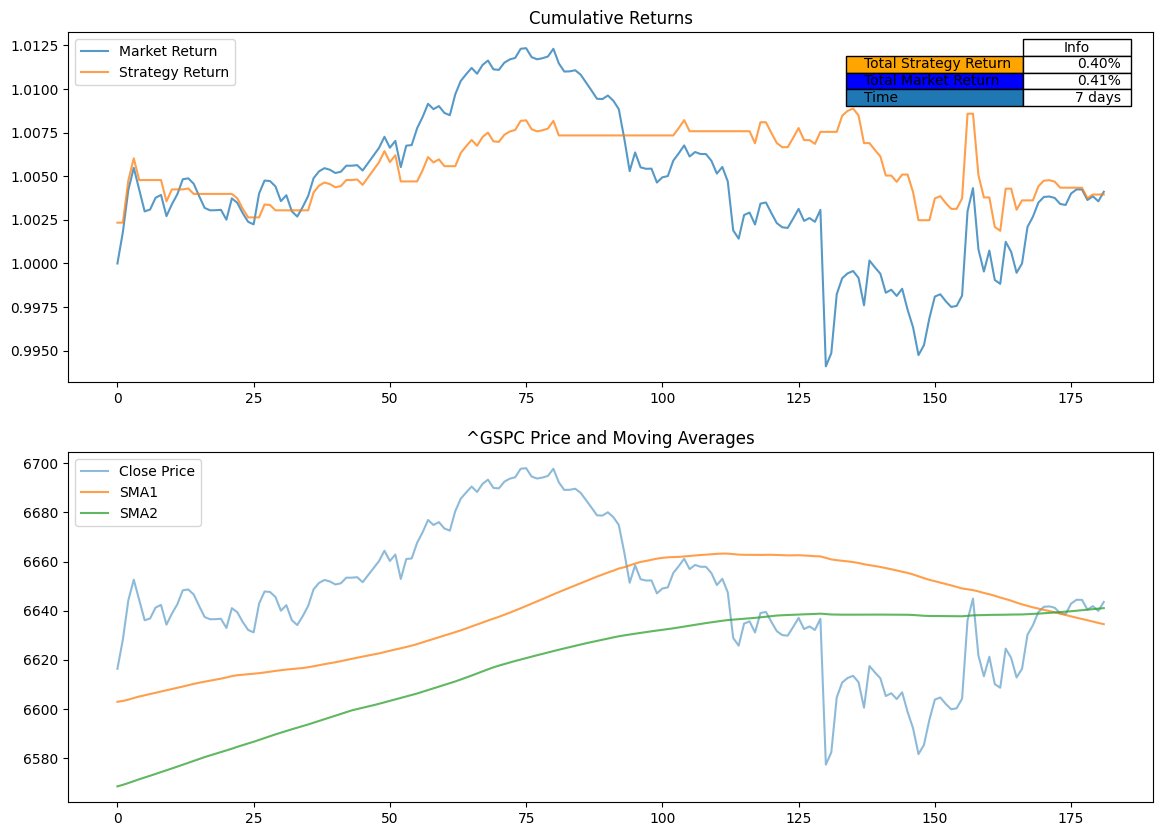

2025-09-27 12:33:49,045 - logics.deliver_last_signal - INFO - WU ->
Last stock date: 2025-09-26 19:45:00+00:00
Limit date: 2025-09-26 20:15:00+00:00
Current date: 2025-09-27 17:33:49.045352+00:00
/home/user/Documents/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df = last_signals_df.iloc[[-1]]
/home/user/Documents/trading/logics/deliver_last_signal.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df = last_signal_df.reset_index(drop=True)

In [306]:
try:
    importlib.reload(sys.modules['logics.deliver_last_signal'])
    importlib.reload(sys.modules['SP500_15m_strategy'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()
sp50015mstrategy.run()
sp50015mstrategy.send_notification(inputs_dict = outputs_dict)

In [283]:
outputs_dict = sp50015mstrategy.outputs_dict
outputs_dict.keys()

dict_keys(['stock_df', 'data_e2_df', 'data_e_df', 'imagebuffer', 'last_signals_df', 'last_signal_df'])

In [284]:

last_signal_df

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0.0,-2.589844,1.004111,1.003954,NA,sp500_15m,CLOSE


In [285]:

if market_status != 'CLOSE'

0    CLOSE
Name: Market Status, dtype: object

# Observations

In [36]:
icols_ls = ['Datetime','Close', 'Open_adj', 'SMA1','sma1_diff', 'signal',
       'order_number', 'order_step', 'strategy_gain', 'pp_change_gain', 'order_gain_balance', 'order_loss_balance',
       'acum_strategy_gain', 'pp_strategy_gain','slope1','tendency',
       'current_return','strategy_return', 'Cumulative Market Return', 'Cumulative Strategy Return']

#data_e_df[icols_ls]

data_e_df[
    #data_e_df['order_number'].isin([1,2])
    #data_e2_df['order_number'].isin([69,70])
    #data_e2_df['signal']==-1
    (data_e_df['index']>=350)&(data_e_df['index']<=400)
][icols_ls]

,Datetime,Close,Open_adj,SMA1,sma1_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,acum_strategy_gain,pp_strategy_gain,slope1,tendency,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
350,2025-07-21 19:30:00+00:00,6309.370117,6314.839844,6291.810010,17.560107,0,34,12,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-4.652002,-6,-0.000866,-0.000000,1.013101,1.014203
351,2025-07-21 19:45:00+00:00,6307.459961,6309.370117,6292.426709,15.033252,0,34,13,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-3.307031,-6,-0.000303,-0.000000,1.012794,1.014203
352,2025-07-22 13:30:00+00:00,6309.669922,6307.459961,6293.075410,16.594512,0,34,14,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-1.741992,-6,0.000350,0.000000,1.013149,1.014203
353,2025-07-22 13:45:00+00:00,6288.279785,6309.669922,6293.534507,-5.254722,0,34,15,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-6.106104,-7,-0.003390,-0.000000,1.009715,1.014203
354,2025-07-22 14:00:00+00:00,6291.040039,6288.279785,6293.903906,-2.863867,0,34,16,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-7.064990,-8,0.000439,0.000000,1.010158,1.014203
355,2025-07-22 14:15:00+00:00,6290.879883,6291.040039,6294.469204,-3.589321,0,34,17,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-5.360986,-8,-0.000025,-0.000000,1.010132,1.014203
356,2025-07-22 14:30:00+00:00,6297.319824,6290.879883,6295.195303,2.124521,1,35,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.695996,1,0.001024,0.000000,1.011166,1.014203
357,2025-07-22 14:45:00+00:00,6299.310059,6297.319824,6295.789502,3.520557,1,35,2,1.990234,0.000000,1.990234,0.000000,1.990234,0.000316,3.125000,2,0.000316,0.000316,1.011486,1.014524
358,2025-07-22 15:00:00+00:00,6296.459961,6299.310059,6296.391104,0.068857,0,35,3,-2.850098,-1.432041,1.990234,-2.850098,-0.859863,-0.000137,1.873047,2,-0.000452,-0.000452,1.011028,1.014065
359,2025-07-22 15:15:00+00:00,6296.979980,6296.459961,6296.987202,-0.007222,0,35,4,0.000000,-0.000000,1.990234,-2.850098,-0.859863,-0.000137,-0.386963,-1,0.000083,0.000000,1.011112,1.014065
